In [45]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

## The Iris data set:

The [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is one of the most frequently used data sets for ~~playing around~~ experimenting with classification models.
It contains measurements of the petals and sepals of 150 representatives of three species of Iris flowers.
(In case you're curious what petals and sepals are, [this image](https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg) might help).

The classification task is then to predict which subspecies of Iris flower ([setosa](https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg), [virginica](https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg) or [versicolor](https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg)) a given individuum belongs to from the petal and sepal measurements.

The dataset is so common, in fact, that it is included in many plotting and machine learning packages and we can load it easily:

In [46]:
iris = sns.load_dataset("iris")

In [47]:
#Visualize how the data is structured.
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


#### A technical note:
The dataset we loaded here uses the `pandas.DataFrame` format.
This format is commonly used for datasets in python, as the pandas package provides many useful functions for handling data.

While pandas is very powerful, you can think of the DataFrame as somewhat similar to a spreadsheet of labeled columns.
You can access the columns of the DataFrame using their names. 
So ```iris[sepal_length]``` or even ```iris.sepal_length``` gives you all sepal lengths in order. 

### Dataset Exploration
Before we start training, let's look at the data.

```iris.describe()``` will automatically calculate some neat statistics for us:

In [48]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can count how many examples we have for each species to make sure none are underrepresented:

In [73]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In machine learning applications, it's a good idea to visualize the data.
This can help you see interesting patterns, and you can run into weird problems if you don't know what's going on in your data. 
Thankfully, pandas provides a tool for that, too:

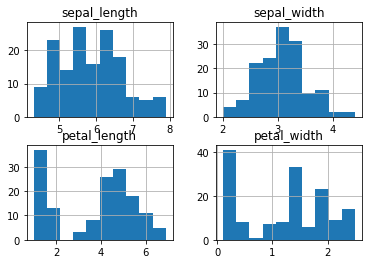

In [49]:
_ = iris.hist() # the '_ = ' at the beginning of the line suppresses some irrelevant output

These distributions are not easy to interpret, and usually it's difficult as a user to make predictions about what consequences a given feature distribution will have.
But if something goes wrong, a look here may help figure out what the problem is.

Another thing that's good to check, is how the distributions look within the different classes. 
This can help you see where your data set may be incomplete or biased.
Again, pandas is useful and helps us pick out and plot the data for each class:

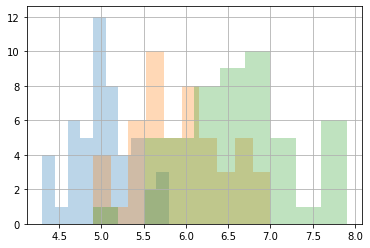

In [50]:
_ = iris.groupby('species').sepal_length.hist(alpha=0.3) 
# we only do it for the sepal length so you don't have to scroll so much...

Pandas is not perfect and does not label our histograms -- colors are blue for setosa, orange for versicolor, and green for virginica.

We can see that the distributions are different for every class, which is an indicator that our petal and sepal measurements really do tell us about the species of Iris we're dealing with.

One final thing to check is the correlations between variables. 
If two of our input variables are strongly correlated to each other it may be a sign that one of them is redundant, and we can probably get rid of it.

Again, pandas has our back:

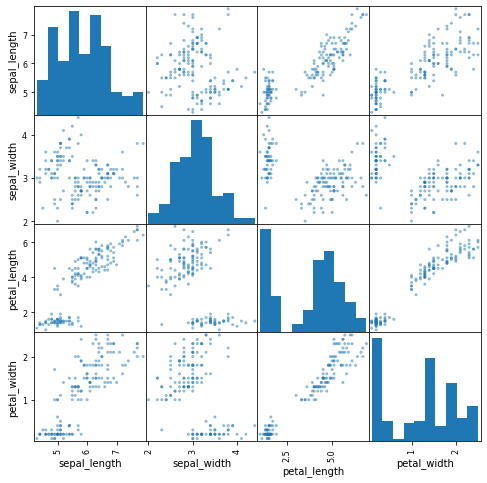

In [51]:
from pandas.plotting import scatter_matrix
_ = scatter_matrix(iris, alpha=0.5, figsize=(8, 8))

That looks good! We can see that at most, petal length and widths are correlated to each other.
However, the correlation is not so strong that we can leave out one of them without losing information.

By the way, the diagonals again show just the distribution of the data. So if you do this plot first, you can get two birds with one stone :)

### Final preparations

Here, we do some final preparations before we start learning: We split the inputs (petal and sepal measurements) from our target (the species) and split the data into training and test sets

In [52]:
#Define your features and your learning target
y = iris.species
X = iris.drop('species',axis=1)

In [53]:
#Divide your sets in training and test
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.30)
print(f"Shape of train set is {train_x.shape}")
print(f"Shape of test set is {test_x.shape}")
print(f"Shape of train labels is {train_y.shape}")
print(f"Shape of test labels is {test_y.shape}")

Shape of train set is (105, 4)
Shape of test set is (45, 4)
Shape of train labels is (105,)
Shape of test labels is (45,)


## Logistic Regression:

Logistic regression uses the maximum likelihood approach.
If you plot any data point in a logistic plot, it will have some measure along the x-axis, and the probability of that measure being either true or false on the y-axis. 
On the y-axis, 1 means true and 0 means false.

Logistic regression is almost always used for classification.

In [87]:
#Define your model
model = LogisticRegression(max_iter = 1000)

In [88]:
#Fitting is easy with sklearn
model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

After fitting, we need a way to quantify quality and visualize results. 
For classification problems, our quality metric of choice is the accuracy score, which is calculated as: 
$$ acc(y_t, y_p) = \frac{1}{n} \sum_{i=0}^{n-1} 1(y_p=y_i) $$

where $y_t$ is the true label, $y_p$ the predicted label, $n$ the number of test samples and $1$ is the function which returns 1 if the two are equal and 0 otherwise.

There are many more metrics which you can calulate for classification problems. The [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) user guide has a helpful collection for you.

For now, we stick to the accuracy:

In [68]:
print(f"The accuracy on the test set is {metrics.accuracy_score(model.predict(test_x),test_y)}")

The accuracy on the test set is 0.9555555555555556


So our model is about 95% accurate.
Now we can check, where our model messes up by plotting the fittingly named *confusion matrix*:
This is a matrix made of bins, where one axis is what the model predicts and the other is what it should predict.
We sort every test data point into a bin according to what our model says and what it should be and calculate the ratio by which the data points with a given true label end up in a given bin. 
The result looks like so:

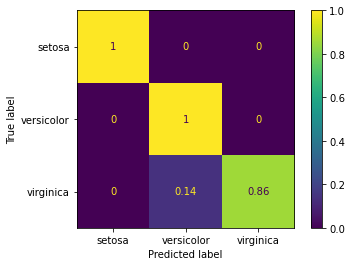

In [62]:
plot_confusion_matrix(model,test_x, test_y,normalize='true')  # doctest: +SKIP
plt.show()  # doctest: +SKIP

So our model is very good at recognizing setosas as setosas and versicolors as versicolors, but misclassifies some virginicas as versicolors.

If we wanted to further improve our model, a good point to start would be to check whether the misclassified virginicas have something in common. 
Another thing you can try is to ensure that examples of all species were equally represented in the training set.

And it's always possible to play around with the options of the LogisticRegression, which you can read more about in the scikit-learn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  

One suggestion: try out what happens if you force the model to give extra weight to the virginica data. 

Edit cell to show Hint: $\color{white}{\text{use the class_weights parameter of the LogisticRegression}}$